# Лаба 1 (Начало)


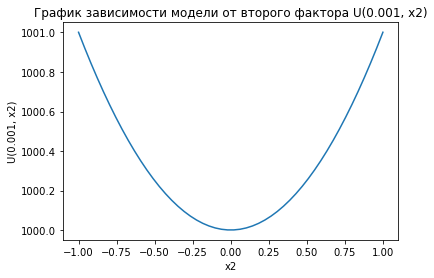

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

u1 = lambda x1, x2: 1 * 0.001 + 1 / x1 * 1 + x1 * 0.001 + x2 * 0.0001 + x2**2 * 1


fig = plt.subplots()
x = np.linspace(-1, 1, 50)
plt.title("График зависимости модели от второго фактора U(0.001, x2)")
plt.xlabel('x2')
plt.ylabel('U(0.001, x2)')
plt.plot(x, u1(0.001, x))
plt.show()

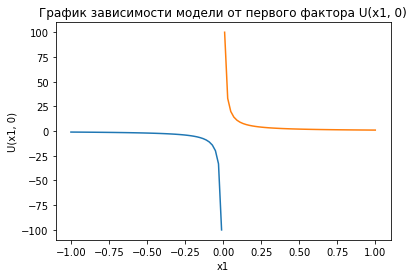

In [2]:
fig = plt.subplots()
x_ = np.linspace(-1, -0.01, 50)
plt.title("График зависимости модели от первого фактора U(x1, 0)")
plt.xlabel('x1')
plt.ylabel('U(x1, 0)')
plt.plot(x_, u1(x_, 0))

x_ = np.linspace(0.01, 1, 50)
plt.plot(x_, u1(x_, 0))
plt.show()

### Генерация данных

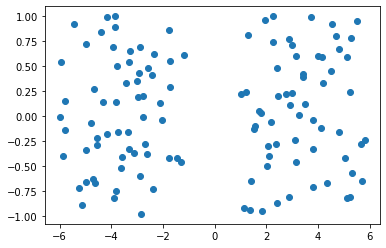

In [3]:
import random as rnd

x1_points = []
x2_points = []

for s in range(0, 120):
    x2_points.append((rnd.random() - 0.5) * 2)
    
for s in range(0, 60):
    x1_points.append(-rnd.random() * 5 - 1)
    x1_points.append(rnd.random() * 5 + 1)
    
        

fig = plt.subplots()
plt.scatter(x1_points, x2_points)
plt.show()

In [4]:
vector_u = list()
leng = len(x1_points)
        
for i in range(leng):
    vector_u.append(u1(x1_points[i], x2_points[i]))

vect_arr_u = np.array(vector_u)
average_u = vect_arr_u.mean()

w2 = np.dot(vect_arr_u - average_u, vect_arr_u - average_u) / (len(vect_arr_u - 1))
p = 0.13
sig = p * (w2)**0.5

# Сгенерировали U с помехами
y = []
for i in range(len(x1_points)):
    y.append(vector_u[i] + np.random.normal(0, sig))

In [5]:
file_1 = open('out_lab_1.txt', 'w')
file_1.write("№\tx1\tx2\tu\ty\n")
for s in range(leng):
    file_1.write(str(s+1)+ "\t" + str(x1_points[s]) + "\t" + str(x2_points[s]) + "\t" + str(vector_u[s]) + "\t" + str(y[s]) + "\n")
    
file_1.close()

# Лаба 2

In [6]:
import math
import scipy
from scipy import optimize

f = lambda x1, x2 : np.array([1, 1/x1, x1, x2, x2**2]) 
teta = np.array([0.001, 1, 0.001, 0.0001, 1])


In [7]:
import math

# Построение матрицы X
X = []
for i in range(len(teta)):
    X.append([])
    for j in range(len(x1_points)):
        X[i].append(f(x1_points[j], x2_points[j])[i])
       
X = np.matrix(X)

Q1 = X.dot(X.T)
Q1 = np.linalg.inv(Q1)
Q1 = Q1.dot(X)
Q1 = Q1 * np.matrix(y).T

In [8]:
e = []
e = y - (X.T).dot(np.matrix(teta).T).T
sigma2 = float(e.dot(e.T)/(len(vect_arr_u)-len(teta))) # Несмещенная оценка оценка дисперсии

F = sigma2 / sig**2

# alpha = 0.05
F_t = 1.2539

string = ''
if F <= F_t:
    string = "Модель адекватная!"
else:
    string = "Модель НЕадекватная!"

file_1 = open('out_lab_2_u_values.txt', 'w')
leng = len(x1_points)
file_1.write("U\ty\tU-y\n")
for s in range(leng):
    file_1.write(str(vect_arr_u[s]) + "\t" + str(y[s]) + "\t" + str(vect_arr_u[s] - y[s]) + "\n")
file_1.close()


file_1 = open('out_lab_2_teta_values.txt', 'w')   
file_1.write("teta\tteta^\n") 
for i in range(4):
    file_1.write(str(teta[i]) + "\t" + str(Q1.A[i][0]) + "\n")
file_1.close()


file_1 = open('out_lab_2_rem_values.txt', 'w')
file_1.write("Sigma**2\tSigma^**2\tF\tF_t\n")
file_1.write(str(sig**2) + "\t" + str(sigma2) + "\t" + str(F) + "\t" + str(F_t) + "\n" + string)
file_1.close()


# Lab_3

1. Изменить модель регрессии, добавив в неё дополнительный регрессор, ранее не вошедший в состав модели, порождающей данные. Не генерируя новых данных, найти точечные оценки всех параметров расширенной модели.
2. Построить доверительные интервалы для каждого параметра модели регрессии.
3. Проверить гипотезу о значимости каждого параметра модели.
4. Проверить гипотезу о значимости самой регрессии.
5. Рассчитать прогнозные значения для математического ожидания функции отклика для всего интервала действия одного из факторов, зафиксировав значения других факторов на границе или в центре области их определения.
6. Построить график прогнозных значений и доверительной полосы для математического ожидания функции отклика и для самого отклика.
7. Заново смоделировать исходные данные (см. лаб. работу № 1), увеличив мощность случайной помехи до 50…70 % от мощности полезного сигнала и провести оценку параметров. Повторить пункты 3, 4 с новыми данными. 

### 1. Изменить модель регрессии, добавив в неё дополнительный регрессор, ранее не вошедший в состав модели, порождающей данные. Не генерируя новых данных, найти точечные оценки всех параметров расширенной модели

In [9]:
import numpy as np
import math
import random

f_old = lambda x1, x2 : np.array([1, 1/x1, x1, x2, x2**2]) 
teta_old = np.array([0.001, 1, 0.001, 0.0001, 1])
u_old = lambda x1, x2: 0.001 + 1/x1 + x1* 0.001 + x2*0.0001 + x2**2

# Добавим регрессор x2/x1
f = lambda x1, x2 : np.array([1, 1/x1, x1, x2, x2**2, x2/x1]) 
teta = np.array([0.001, 1, 0.001, 0.0001, 1, 0.015])
u = lambda x1, x2: 0.001 + 1/x1 + x1* 0.001 + x2*0.0001 + x2**2 + x2/x1*0.015

# Генерирует точки (120)
def generateData():
    import random as rnd

    x1_points = []
    x2_points = []

    for s in range(0, 120):
        x2_points.append((rnd.random() - 0.5) * 2)

    for s in range(0, 60):
        x1_points.append(-rnd.random() * 5 - 1)
        x1_points.append(rnd.random() * 5 + 1)
    return x1_points, x2_points

# Строит модель из 2 лабы
def lab_2(f, teta, u, x1_array, x2_array, p):   
    vector_u = list()

    # Рассчиатли U
    for i in range(len(x1_points)):
        vector_u.append(u(x1_points[i], x2_points[i]))

    vect_arr_u = np.array(vector_u)
    average_u = vect_arr_u.mean()

    w2 = np.dot(vect_arr_u - average_u, vect_arr_u - average_u) / (len(vect_arr_u - 1))  
    sig = p * (w2)**0.5

    # Сгенерировали U с помехами (y)
    y = []
    for i in range(len(x1_points)):
        y.append(vector_u[i] + np.random.normal(0, sig))
    
    # Построение матрицы X
    X = []
    for i in range(len(teta)):
        X.append([])
        for j in range(len(x1_points)):
            X[i].append(f(x1_points[j], x2_points[j])[i])

    X = np.matrix(X)

    Q_ = X.dot(X.T)
    Q_ = np.linalg.inv(Q_)
    Q_ = Q_.dot(X)
    Q_ = Q_ * np.matrix(y).T
    
    e = []
    e = y - (X.T).dot(np.matrix(teta).T).T
    sigma2 = float(e.dot(e.T)/(len(vect_arr_u)-len(teta))) # Несмещенная оценка оценка дисперсии

    F = sigma2 / sig**2
        
    return Q_, F, X, sigma2, y, vector_u


In [10]:
# Считывание старых значений x1, x2
def readFunc(stringIn):
    file = open(stringIn, "r")
    file.readline()
    
    x1_l = list()
    x2_l = list()
    for i in range(120):
        string = file.readline()
        supp = string.split()
        x1_l.append(supp[1])
        x2_l.append(supp[2])
    return x1_l, x2_l

x1_arr, x2_arr = readFunc("input_x1_x2.txt")


In [11]:
# Оценки старой модели
Q_old, F_old, X_old, sig2_old, y_old, u_old = lab_2(f_old, teta_old, u_old, x1_arr, x2_arr, 0.13)
print(Q_old, sig2_old, F_old)

[[0.00921468]
 [0.97844737]
 [0.0031275 ]
 [0.00516286]
 [0.96215387]] 0.004664036881662897 1.0595831316120266


In [12]:
# Оценки новой модели
Q, F, X, sig2, y, u_arr = lab_2(f, teta, u, x1_arr, x2_arr, 0.13)
print(Q, sig2, F)

[[-0.00660763]
 [ 1.01294766]
 [-0.00379473]
 [-0.01227923]
 [ 1.02598707]
 [ 0.01284678]] 0.004205539069076995 0.9558217799346785


### 2. Построить доверительные интервалы для каждого параметра модели регрессии

In [13]:
# Для 6 параметров и выборки в количестве 120 квантиль Стьюдента = 1.98
t_alpha = 1.98

def point2(X, sig2, Q, t_alpha):
    djj = np.diagonal(np.linalg.inv(X.dot(X.T)))
    sigma_qj = np.diagonal(sig2 * np.linalg.inv(X.dot(X.T)))**0.5

    Q_min = Q - t_alpha * np.matrix(sigma_qj).T
    Q_max = Q + t_alpha * np.matrix(sigma_qj).T
    return djj, Q_min, Q_max, sigma_qj

djj, Q_min, Q_max, sigma_qj = point2(X, sig2, Q, t_alpha)

print(Q_min.T)
print()
print(Q_max.T)

[[-0.02374725  0.9706178  -0.0082295  -0.0339016   0.98564655 -0.04159134]]

[[1.05320000e-02 1.05527751e+00 6.40030820e-04 9.34314130e-03
  1.06632759e+00 6.72849100e-02]]


### 3. Проверить гипотезу о незначимости каждого параметра модели

In [14]:
# F_{1, 114} = 3.84144
def check1(teta, sig2, djj):
    f=[]
    for i in range(len(teta)):
        s = float(Q[i][0]**2/sig2/djj[i])
        f.append(s)
        if float(f[i]) < 3.84144:
            print('Принимается')
        else:
            print('Отвергается')
        
check1(teta, sig2, djj)
print(teta)
print(Q.T[0])

Принимается
Отвергается
Принимается
Принимается
Отвергается
Принимается
[1.0e-03 1.0e+00 1.0e-03 1.0e-04 1.0e+00 1.5e-02]
[[-0.00660763  1.01294766 -0.00379473 -0.01227923  1.02598707  0.01284678]]


### 4. Проверить гипотезу о значимости самой регрессии

In [15]:
# alpha = 0.05 F_{5, 114} = 4.3985
def check2(y, X, Q, u_arr):
    RSS=(np.array(y)-X.T.dot(Q).T)
    RSS=float(RSS.dot(RSS.T))
    RSSh=0
    for i in range(len(y)):
        RSSh+=(y[i]-np.mean(u_arr))**2
    m=6
    n=120
    q=m - 1
    F=((RSSh-RSS)/q)/(RSS/(n-m))
    string = ""
    print(F)
    if F < 4.3985: 
        string = "Гипотеза принимается"
    else:
        string = "Гипотеза отвергается"
    return string

print(check2(y, X, Q, u_arr))    

1605.4442738935288
Гипотеза отвергается


### 5. Рассчитать прогнозные значения для математического ожидания функции отклика для всего интервала действия одного из факторов, зафиксировав значения других факторов на границе или в центре области их определения

In [49]:
def sigma_nu (x1, x2) : 
    return sigma2*np.array(f(x1,x2)*np.linalg.inv(X.dot(X.T))*np.matrix(f(x1,x2)).T)**0.5

nu = lambda x1, x2, Q : sum(np.array([1*Q[0], x1*Q[1], x1**2*Q[2], x2**2*Q[3], x2*Q[4], x1 * x2*Q[5]]))
nu_min = lambda x1, x2, Q : np.float64(nu(x1,x2,Q) - t_alpha*(sigma_nu(x1,x2)[0][0]))
nu_max = lambda x1, x2, Q : np.float64(nu(x1,x2,Q) + t_alpha*(sigma_nu(x1,x2)[0][0]))


### 6. Построить график прогнозных значений и доверительной полосы для математического ожидания функции отклика и для самого отклика

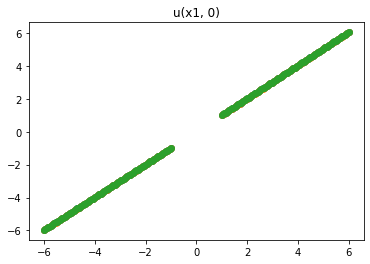

In [50]:
fig = plt.subplots()

x = []
x1 = np.linspace(-6, -1,100)
x2 = np.linspace(1, 6, 100)

for i in range(100):
    x.append(x1[i])
    
for i in range(100):
    x.append(x2[i])    

plt.scatter(np.float64(x), nu(np.float64(x), 0, np.array(teta)))
plt.scatter(np.float64(x), nu_min(np.float64(x), 0, np.array(teta)))
plt.scatter(np.float64(x), nu_max(np.float64(x), 0, np.array(teta)))
plt.title('u(x1, 0)')
plt.show()

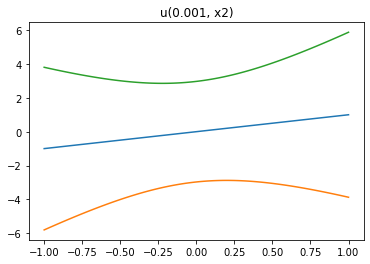

In [51]:
fig = plt.subplots()

x = np.linspace(-1, 1,100)
plt.plot(x, nu(0.001, x, np.array(teta)))
plt.plot(x, nu_min(0.001, x, np.array(teta)))
plt.plot(x, nu_max(0.001, x, np.array(teta)))
plt.title('u(0.001, x2)')
plt.show()

### 7. Заново смоделировать исходные данные (см. лаб. работу № 1), увеличив мощность случайной помехи до 50…70 % от мощности полезного сигнала и провести оценку параметров. Повторить пункты 3, 4 с новыми данными

In [27]:
x1_arr1, x2_arr1 = generateData()

Q_new, F_new, X_new, sig2_new, y_new, u_new = lab_2(f, teta, u, x1_arr1, x2_arr1, 0.67)
djj, Q_min, Q_max, sigma_qj = point2(X, sig2, Q, t_alpha)

# Пункт 3
check1(teta, sig2_new, djj)
print(teta)
print(Q.T[0])



Принимается
Отвергается
Принимается
Принимается
Отвергается
Принимается
[1.0e-03 1.0e+00 1.0e-03 1.0e-04 1.0e+00 1.5e-02]
[[-0.00660763  1.01294766 -0.00379473 -0.01227923  1.02598707  0.01284678]]


In [28]:
# Пункт 4
print(check2(y_new, X_new, Q_new, u_new))   

72.73110126356525
Гипотеза отвергается
